In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from calendar import day_abbr, month_abbr, mdays

# Prophet setting
import fbprophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )
import os
import sys
from glob import glob 
%matplotlib inline

In [2]:
fbprophet.__version__

'0.6'

In [3]:
# Customized Functions
import utilities as utils
import dash_func

In [4]:
# read data and parse the date column
pd_df = pd.read_csv('topline_metrics.csv',index_col=0, parse_dates=True)
# drop off duplications
pd_no_dup = pd_df.drop_duplicates()

### Focus on TRU and Selected Presentative Countires

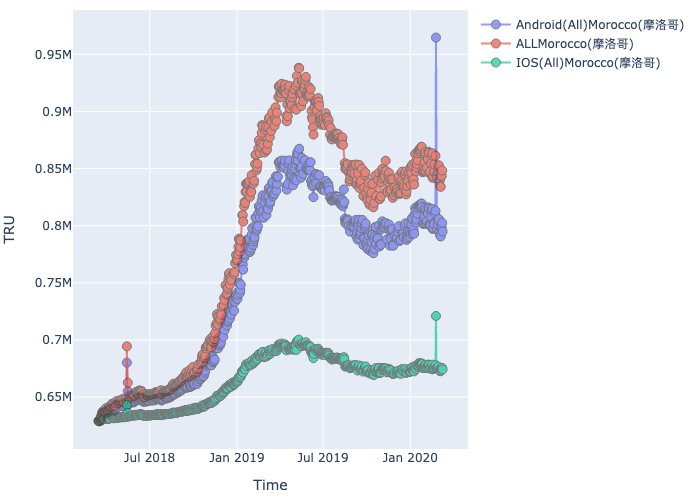

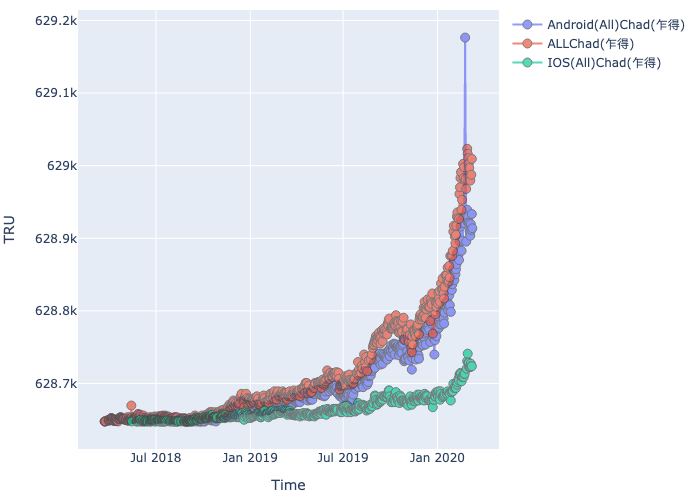

In [5]:
selected_countries = ['Taiwan(台湾)', 'Chad(乍得)' , 'Italy(意大利)', 'Burkina Faso(布基纳法索)', 
                    'China(中国)', 'Moldova(摩尔多瓦)', 'Morocco(摩洛哥)', 
                    'Iraq(伊拉克)', 'Palestine(巴勒斯坦)', 'Congo (DRC)(刚果(金))']
set_countries = set(list(pd_no_dup.Country.unique()))

In [6]:
dash_func.get_filtered_data?

In [7]:
# get filtered data
filteres = [{'Country':['Morocco(摩洛哥)']},{'Platform':['Android(All)']}]
bool_mask, attrs = dash_func.get_filtered_data(pd_no_dup, filteres)
pd_morocco_raw = pd_no_dup[bool_mask[0]]
pd_morocco_raw.sort_index(inplace=True)
pd_morocco_raw.head()

,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
Date,,,,,,,,,,,,,
2018-03-16,2018-03-16,Android(All),Morocco(摩洛哥),629342.25,15789.68,43429.11,3428.09,17.58,1.3,2.3,4527.01,58.05,86.74
2018-03-17,2018-03-17,Android(All),Morocco(摩洛哥),629540.34,15710.21,43429.11,3428.09,17.58,1.3,2.3,4527.01,56.94,102.98
2018-03-18,2018-03-18,Android(All),Morocco(摩洛哥),629701.57,15704.45,43429.11,3428.09,17.58,1.3,2.3,4527.01,57.57,100.22
2018-03-19,2018-03-19,Android(All),Morocco(摩洛哥),629931.90,15826.53,43429.11,3428.09,17.58,1.3,2.3,4527.01,48.19,75.23
2018-03-20,2018-03-20,Android(All),Morocco(摩洛哥),631683.55,17281.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,46.55,64.52


In [8]:
#2018-03-15  2020-03-09
df_date = pd.date_range(start='3/15/2018', end='3/09/2020').to_frame()
df_date = df_date.rename(columns={0:'ds'})

In [9]:
pd_morocco = pd.merge(df_date,pd_morocco_raw,how='left',left_index=True,right_index=True)

In [10]:
pd_morocco.head()

,ds,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
2018-03-15,2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-16,2018-03-16,2018-03-16,Android(All),Morocco(摩洛哥),629342.25,15789.68,43429.11,3428.09,17.58,1.3,2.3,4527.01,58.05,86.74
2018-03-17,2018-03-17,2018-03-17,Android(All),Morocco(摩洛哥),629540.34,15710.21,43429.11,3428.09,17.58,1.3,2.3,4527.01,56.94,102.98
2018-03-18,2018-03-18,2018-03-18,Android(All),Morocco(摩洛哥),629701.57,15704.45,43429.11,3428.09,17.58,1.3,2.3,4527.01,57.57,100.22
2018-03-19,2018-03-19,2018-03-19,Android(All),Morocco(摩洛哥),629931.90,15826.53,43429.11,3428.09,17.58,1.3,2.3,4527.01,48.19,75.23


In [11]:
#utils.median_filter?

In [12]:
#pd_morocco['TRU_filtered'] = utils.median_filter(pd_morocco,varname='TRU', window = 7, std = 1)

In [13]:
# after simple medium filter
#pd_morocco[['TRU','TRU_filtered']].plot()

In [14]:
# check filtered datapoints
#filtered_points = pd_morocco.TRU_filtered.isna().sum()
#f'Filtered Data Points: {filtered_points}'

Text(0, 0.5, 'TRU')

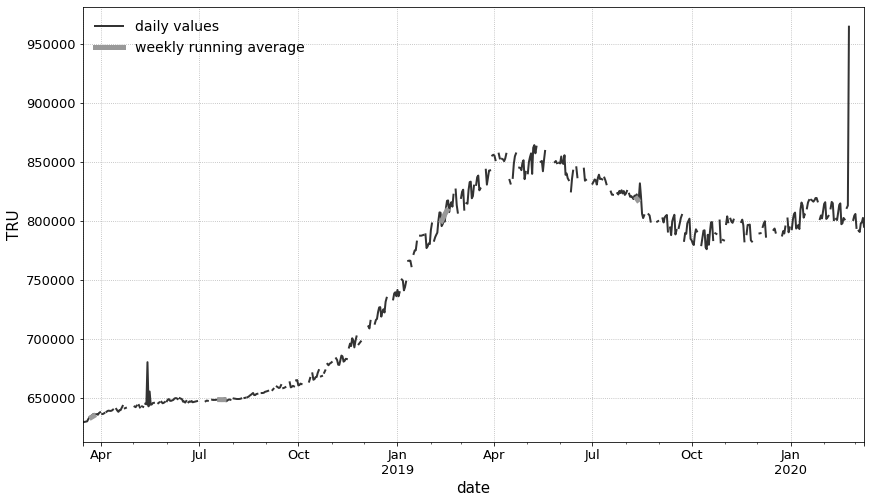

In [15]:
# simple visulizations
data = pd_morocco.TRU
data = data.to_frame()
f, ax = plt.subplots(figsize=(14,8))

data.plot(ax=ax, lw=2, color='0.2')

data.rolling(window=14, center=True).mean().plot(ax=ax, ls='-', lw=5, color='0.6')

ax.grid(ls=':')
ax.legend(['daily values','weekly running average'], frameon=False, fontsize=14)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('date', fontsize=15)

ax.set_ylabel('TRU', fontsize=15)

In [16]:
pd_morocco.index

DatetimeIndex(['2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18',
               '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22',
               '2018-03-23', '2018-03-24',
               ...
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09'],
              dtype='datetime64[ns]', length=726, freq='D')

In [63]:
test_time = '2020-01-09'
data = data.rename(columns={'TRU':'y'})
data_train, data_test = utils.prepare_data(data, test_time)

In [64]:
data_train = data_train.rename(columns={'index':'ds'})
data_test = data_test.rename(columns={'index':'ds'})

### Instantiate, then fit the model to the training data 

The first step in fbprophet is to instantiate the model, it is there that you can set the prior scales for each component of your time-series, as well as the number of Fourier series to use to model the cyclic components.   
A general rule is that larger prior scales and larger number of Fourier series will make the model more flexible, but at the potential cost of generalisation: i.e. the model might overfit, learning the noise (rather than the signal) in the training data, but giving poor results when applied to yet unseen data (the test data)... exapnding window cross-validation could be used to set these hyperparameters.

In [65]:
Prophet = fbprophet.Prophet

In [80]:
m = Prophet(#mcmc_samples=300, 
            #growth='logistic',
            changepoint_prior_scale=0.05,
            changepoint_range=1.0,
            interval_width=0.90,
            #seasonality_mode='multiplicative', \
            yearly_seasonality='auto', \
            weekly_seasonality='auto', \
            daily_seasonality='auto',
           )
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [81]:
data_train['cap'] = max(pd_morocco.TRU*1.1)
m.fit(data_train)

In [82]:
future = m.make_future_dataframe(periods=len(data_test), freq='1D')

### Forecast

In [83]:
future['cap'] = max(pd_morocco.TRU*1.1)
forecast = m.predict(future)

### plots the `components` of the forecast (trend + periodic component [yearly seasonality, weekly seasonality])

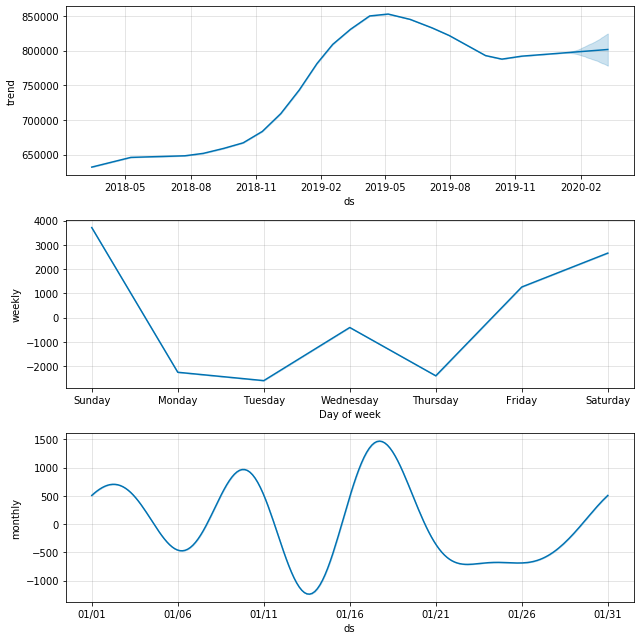

In [84]:
f = m.plot_components(forecast)

In [85]:
verif = utils.make_verif(forecast, data_train, data_test)

In [95]:
verif.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,,,
2018-03-15,2018-03-15,632041.070406,NaN,621314.570731,637755.916368,632041.070406,632041.070406,-2581.349526,-2581.349526,-2581.349526,...,-185.854469,-185.854469,-2395.495057,-2395.495057,-2395.495057,0.0,0.0,0.0,629459.720880,NaN
2018-03-16,2018-03-16,632295.895167,NaN,624565.108708,640531.623497,632295.895167,632295.895167,284.903900,284.903900,284.903900,...,-980.973725,-980.973725,1265.877625,1265.877625,1265.877625,0.0,0.0,0.0,632580.799067,629342.25
2018-03-17,2018-03-17,632550.719928,NaN,625979.120955,642263.294691,632550.719928,632550.719928,1431.142470,1431.142470,1431.142470,...,-1231.553762,-1231.553762,2662.696231,2662.696231,2662.696231,0.0,0.0,0.0,633981.862397,629540.34
2018-03-18,2018-03-18,632805.544689,NaN,627557.344869,644362.016700,632805.544689,632805.544689,2977.415714,2977.415714,2977.415714,...,-737.253640,-737.253640,3714.669354,3714.669354,3714.669354,0.0,0.0,0.0,635782.960403,629701.57
2018-03-19,2018-03-19,633060.369449,NaN,622280.701442,639052.153813,633060.369449,633060.369449,-2017.067323,-2017.067323,-2017.067323,...,232.386709,232.386709,-2249.454032,-2249.454032,-2249.454032,0.0,0.0,0.0,631043.302126,629931.90


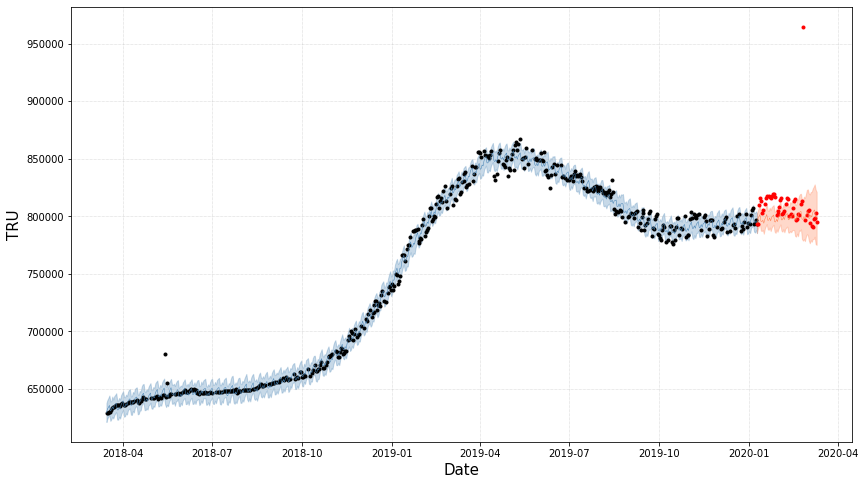

In [86]:
f = utils.plot_verif(verif, test_time)

### residuals distributions (test set)

In [96]:
residuals = 100*(verif.loc[test_time:,'yhat'] - verif.loc[test_time :,'y'])/verif.loc[test_time :,'yhat']
MAPE = abs(residuals).mean()
WMAPE = 100*abs(verif.loc[test_time :,'yhat'] - verif.loc[test_time :,'y']).sum()/verif.loc[test_time :,'yhat'].sum()
SMAPE = 2*100*abs(verif.loc[test_time :,'yhat'] - verif.loc[test_time :,'y']).sum()/(verif.loc[test_time :,'y'].sum()+verif.loc[test_time :,'yhat'].sum())

Text(0.05, 0.65, 'MAPE = +1.54%\nWMAPE = +1.31%\nSMAPE = +1.41%\nMedian = -0.92%\nMean = -1.28%')

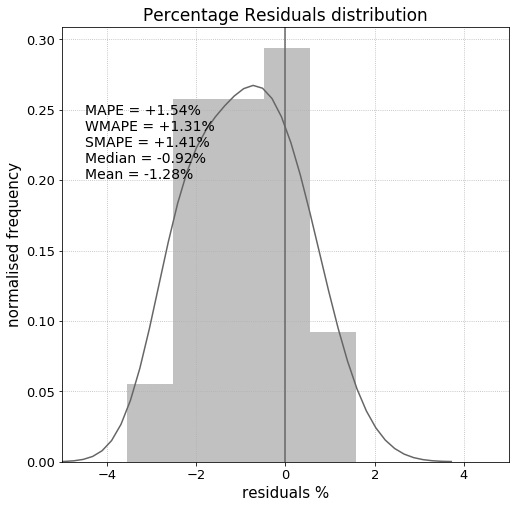

In [97]:
f, ax = plt.subplots(figsize=(8,8))
sns.distplot(residuals, ax=ax, color='0.4')
ax.grid(ls=':')
ax.set_xlabel('residuals %', fontsize
              =15)
ax.set_ylabel("normalised frequency", fontsize=15)
ax.grid(ls=':')

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()];

ax.axvline(0, color='0.4')

ax.set_title(f'Percentage Residuals distribution', fontsize=17)
ax.set_xlim([-5,5])
ax.text(0.05, 0.65, 
        "MAPE = {:+4.2f}%\nWMAPE = {:+4.2f}%\nSMAPE = {:+4.2f}%\nMedian = {:+4.2f}%\nMean = {:+4.2f}%".\
        format(MAPE, WMAPE, SMAPE,residuals.median(), residuals.mean()), \
        fontsize=14, transform=ax.transAxes)

### Hyper Parameters Tunning via Expanding Window and Grid Search

In [107]:
# 3-exoanding window based cross-validation for parameter tuning
test_list = [('2019-12-09','2020-01-09'),('2020-1-09','2020-02-09'),('2020-02-09','2020-03-09')]
best_param = []
Min_SMAPE = []
for seasonality_mode in ['additive','multiplicative']:
    for changepoint_prior_scale in [0.01, 0.05, 0.1]:
        for changepoint_range in [0.8, 0.9, 1.0]:
            for month_fft in [3, 5, 10, 20]:
                SMAPE_ALL = []
                for test_start, test_end in test_list:
                    # setup training /validation set
                    data_train, data_test = utils.prepare_data(data, test_start)
                    data_train = data_train.rename(columns={'index':'ds'})
                    data_test = data_test.rename(columns={'index':'ds'})
                    data_train['cap'] = max(pd_morocco.TRU*1.1)

                    # setup model params
                    param_dict = {'growth': 'linear',
                                'changepoint_prior_scale': changepoint_prior_scale,
                                'changepoint_range':changepoint_range,
                                'interval_width':0.90,
                                'seasonality_mode':seasonality_mode,
                                'yearly_seasonality':'auto', 
                                'weekly_seasonality':'auto',
                                'daily_seasonality':'auto',}
                    m = Prophet(**param_dict)
                    m.add_seasonality(name='monthly', period=30.5, fourier_order=month_fft)
                    m.fit(data_train)
                    future['cap'] = max(pd_morocco.TRU*1.1)
                    forecast = m.predict(future)
                    future = m.make_future_dataframe(periods=len(data_test), freq='1D')
                    
                    
                    # calculate metrics
                    verif = utils.make_verif(forecast, data_train, data_test)
                    residuals = 100*(verif.loc[test_start: test_end,'yhat'] - verif.loc[test_start : test_end,'y'])/verif.loc[test_start : test_end,'yhat']
                    #MAPE = abs(residuals).mean()
                    #WMAPE = 100*abs(verif.loc[test_time :,'yhat'] - verif.loc[test_time :,'y']).sum()/verif.loc[test_time :,'yhat'].sum()
                    SMAPE = 2*100*abs(verif.loc[test_start : test_end,'yhat'] - verif.loc[test_start : test_end,'y']).sum()/(verif.loc[test_start : test_end,'y'].sum()+verif.loc[test_start : test_end,'yhat'].sum())
                    #print(f'SMAPE={SMAPE}')
                    SMAPE_ALL.append(SMAPE)
            if not Min_SMAPE  or Min_SMAPE > np.mean(SMAPE_ALL):
                Min_SMAPE = SMAPE
                param_dict['month_fft'] = month_fft
                best_param = param_dict

In [108]:
print(f'Min SMAPE = {Min_SMAPE} with params = {best_param}')

Min SMAPE = 2.0553509455765364 with params = 20
